## Multilayer Perceptron

### Uma MLP (Multilayer Perceptron) em modelos de regressão em Machine Learning funciona de maneira a aprender uma função que mapeia um conjunto de entradas para uma saída contínua. Isto ocorre da seguinte maneira:

### 1 - **Estrutura da MLP** 
#### Uma MLP é composta por uma camada de entrada, uma ou mais camadas ocultas (hidden layers) e uma camada de saída. Cada camada contém neurônios que realizam operações matemáticas nas entradas para gerar saídas.

### 2 - **Camada de Entrada** 
#### Esta camada recebe os dados de entrada, que podem ser características (features) de um conjunto de dados. Cada neurônio na camada de entrada representa uma característica específica.

### 3 - **Camadas Ocultas** 
#### Estas são camadas intermediárias entre a camada de entrada e a camada de saída. Cada neurônio em uma camada oculta recebe entradas das camadas anteriores (seja a camada de entrada ou outra camada oculta) e aplica uma transformação não linear às entradas. A quantidade de camadas ocultas e o número de neurônios em cada camada são hiperparâmetros que podem ser ajustados para otimizar o desempenho da rede.

### 4 - **Função de Ativação** 
#### Cada neurônio em uma camada oculta aplica uma função de ativação não linear (como ReLU, sigmoid, tanh) aos seus inputs ponderados. Isso introduz não linearidades na rede, permitindo que a MLP aprenda relações complexas nos dados.

### 5 - **Camada de Saída** 
#### Esta camada produz a saída final da rede, que é uma previsão contínua em modelos de regressão. Dependendo do problema, pode haver um único neurônio na camada de saída (para prever uma única saída contínua) ou múltiplos neurônios (para prever várias saídas simultaneamente).

### 6 - **Treinamento** 
#### Durante o treinamento, a MLP ajusta os pesos das conexões entre os neurônios usando algoritmos de otimização como o Gradiente Descendente Estocástico (SGD). O objetivo é minimizar uma função de perda que quantifica o quão distantes as previsões da rede estão dos valores reais. Para problemas de regressão, a função de perda comum é o erro quadrático médio (MSE), mas outras funções de perda podem ser usadas dependendo do contexto.

### 7 - **Aprendizado** 
#### A MLP aprende os padrões nos dados ao atualizar iterativamente os pesos das conexões entre os neurônios durante o treinamento. Isso permite que a rede se ajuste aos dados de treinamento e generalize para novos dados, fazendo previsões precisas.

### 8 - **Regularização** 
#### Para evitar overfitting (sobreajuste), técnicas de regularização como dropout, L1 ou L2 regularization podem ser aplicadas durante o treinamento. Isso ajuda a controlar a complexidade da rede e melhorar sua capacidade de generalização.

---------------------------------------------------------------------------------------------------------------------------------------------------------

#### Para implementar um modelo de MLP (Multi-layer Perceptron) usando scikit-learn, seguimos um procedimento similar aos anteriores, mas desta vez configurando os parâmetros específicos para uma rede neural MLP.

In [1]:
# Importar Bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Carregar os dados
data = pd.read_csv('datasets/SPAECE_2018_codificado.csv')

In [3]:
# Dividir as features e o target
features = ['SEXO', 'IDADE', 'FORMACAO DA MAE', 'FORMACAO DO PAI', 'ACESSO A INTERNET', 
            'NUMERO DE COMPUTADORES', 'INICIOU OS ESTUDOS', 'CURSO O ENSINO FUNDAMENTAL', 
            'REPROVOU', 'ABANDONOU A ESCOLA', 'GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE', 
            'PROFESSORES TIRAM DUVIDAS', 'PROFESSORES CORRIGEM AS ATIVIDADES', 'TURNO ESCOLAR', 
            'NUMERO DE PONTOS EM PORTUGUES','PROFICIENCIA EM PORTUGUES']

# Retirado 'NUMERO DE PONTOS EM MATEMATICA' por conta do viés com a coluna target 

X = data[features]
y = data['PROFICIENCIA EM MATEMATICA']

In [4]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Treinar o modelo MLP (Multi-layer Perceptron)
model = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', alpha=0.0001, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Hiperparametros:
# Hidden layers: 50, 50
# Activation: ReLu
# Solver: Adam
# Alpha: 0.0001
# Max iterations: 1000
# Replicable training: Yes

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

In [6]:
# Fazer previsões
y_pred = model.predict(X_test)

In [7]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

In [8]:
# Exibir as métricas
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 1726.5806535328438
Root Mean Squared Error (RMSE): 41.552143789855705
Mean Absolute Error (MAE): 32.744909408655026
Mean Absolute Percentage Error (MAPE): 12.137639966200002
R² Score: 0.3807000857755227


In [9]:
# Ajustar uma linha de regressão linear simples para os dados previstos vs reais
regressor = LinearRegression()
regressor.fit(y_test.values.reshape(-1, 1), y_pred)

# Coeficientes da linha de regressão
slope = regressor.coef_[0]
intercept = regressor.intercept_

# Gerar pontos para a linha de regressão
x_line = np.linspace(y_test.min(), y_test.max(), 100)
y_line = slope * x_line + intercept

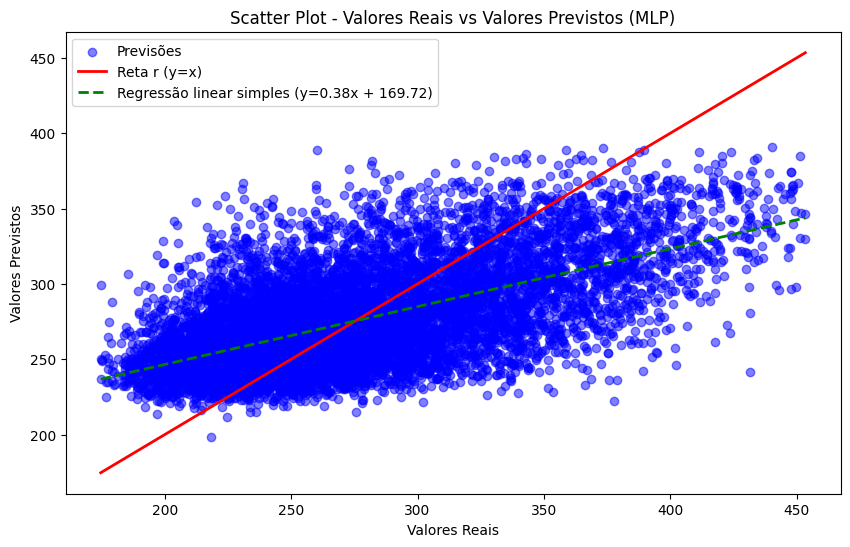

In [10]:
# Gráfico Scatter Plot Valores Reais x Valores Previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Previsões')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Reta r (y=x)')
plt.plot(x_line, y_line, color='green', lw=2, linestyle='--', label=f'Regressão linear simples (y={slope:.2f}x + {intercept:.2f})')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Scatter Plot - Valores Reais vs Valores Previstos (MLP)')
plt.legend()
plt.show()